In [38]:
import pickle
import numpy as np
from statsmodels.regression.linear_model import OLS

with open('addons/imr90/coop_matrix_all_new_spaced_sub_2.pkl', 'rb') as handle:
    values_fresh = pickle.load(handle)

In [115]:
import matplotlib.pyplot as plt
def get_x_y_for_motifs(keyn):
    vals, label = values_fresh[keyn]
    control = values_fresh['control']
    
    [motif1_only, motif2_only, data_in_spacings, motif1_only_rev, motif2_only_rev, data_in_spacings_rev, distance] = vals
    
    all_data = data_in_spacings+data_in_spacings_rev
    all_data_m1 = motif1_only + motif1_only_rev
    all_data_m2 = motif2_only + motif2_only_rev

    plot_dist= []
    plot_vals_mean = []
    plot_vals = []
    m1_vals = []
    m2_vals = []
    
    control1 = []
    for idx in range(len(distance)):
        plot_vals_mean.append(np.log(np.mean(np.squeeze(all_data[idx][1]), axis=-1)))
        plot_vals.append(np.log(np.squeeze(all_data[idx][1])))
        m1_vals.append(np.log(np.squeeze(all_data_m1[idx][1])))
        m2_vals.append(np.log(np.squeeze(all_data_m2[idx][1])))
        plot_dist.append([distance[idx]]*all_data[idx][1].shape[0])
        control1.append(np.log(np.squeeze(control[1])))
        
    jidx = np.argmax(plot_vals_mean)
    m1 = np.array(m1_vals[jidx]).flatten()
    m2 = np.array(m2_vals[jidx]).flatten()
    controls = np.array(control1[jidx]).flatten()
    Y = np.array(plot_vals[jidx]).flatten() - controls - (m1-controls) - (m2-controls)
    X = np.array([(m1-controls)*(m2-controls)]).transpose()*10
    #from scipy import stats
    #X = np.array([stats.zscore((m1-controls))*stats.zscore((m2-controls))]).transpose()
   
    
    print("max effect mean Y:", np.mean(Y))
    print("distance:", distance[jidx])
    if np.mean((m1-controls))>0:
        print("direction of m1:", np.mean((m1-controls)) )
    else:
        print("direction of m1:", np.mean((m1-controls)) )
        
    if np.mean((m2-controls))>0:
        print("direction of m2:", np.mean((m2-controls)) )
    else:
        print("direction of m2:", np.mean((m2-controls)) )

    plt.figure()
    plt.plot((all_data_m1[jidx][0].mean(0)-control[0].mean(0)), label="motif 1")
    plt.plot((all_data_m2[jidx][0].mean(0)-control[0].mean(0)), label="motif 2")
    plt.plot((all_data_m1[jidx][0].mean(0)+all_data_m2[jidx][0].mean(0)-2*control[0].mean(0)), label="motif 1 + motif 2")
    plt.plot((all_data[jidx][0].mean(0)-control[0].mean(0)), label="coord motif")
    plt.legend()
    plt.show()
    
    print(X.mean(), X.shape)
    print(Y.mean(0), Y.shape)
    plt.scatter(np.squeeze(X), np.squeeze(Y))
          
    jidx = np.argmin(plot_vals_mean)
    m1 = np.array(m1_vals[jidx]).flatten()
    m2 = np.array(m2_vals[jidx]).flatten()
    controls = np.array(control1[jidx]).flatten()
    Y1 = (np.array(plot_vals[jidx]).flatten() - controls)/controls - (m1-controls)/controls - (m2-controls)/controls
    X1 = np.array([(m1-controls)*(m2-controls)]).transpose()*10
    #X1 = np.array([stats.zscore((m1-controls))*stats.zscore((m2-controls))]).transpose()

    print("min effect mean Y:", np.mean(Y1))
    print("distance:", distance[jidx])
    if np.mean((m1-controls))>0:
        print("direction of m1:", np.mean((m1-controls)) )
    else:
        print("direction of m1:", np.mean((m1-controls)) )
        
    if np.mean((m2-controls))>0:
        print("direction of m2:", np.mean((m2-controls)) )
    else:
        print("direction of m2:", np.mean((m2-controls)) )
    
 
    plt.figure()
    plt.plot((all_data_m1[jidx][0].mean(0)-control[0].mean(0)), label="motif 1")
    plt.plot((all_data_m2[jidx][0].mean(0)-control[0].mean(0)), label="motif 2")
    plt.plot((all_data_m1[jidx][0].mean(0)+all_data_m2[jidx][0].mean(0)-2*control[0].mean(0)), label="motif 1 + motif 2")
    plt.plot((all_data[jidx][0].mean(0)-control[0].mean(0)), label="coord motif")
    plt.legend()
    plt.show()
    
    rdx=np.argmax(np.squeeze(Y1))
    plt.figure()
    plt.plot((all_data_m1[jidx][0][rdx]-control[0][rdx]), label="motif 1")
    plt.plot((all_data_m2[jidx][0][rdx]-control[0][rdx]), label="motif 2")
    plt.plot((all_data_m1[jidx][0][rdx]+all_data_m2[jidx][0][rdx]-2*control[0][rdx]), label="motif 1 + motif 2")
    plt.plot((all_data[jidx][0][rdx]-control[0][rdx]), label="coord motif")
    plt.legend()
    plt.show()
       
    print(X1.mean(), X1.shape)
    print(Y1.mean(0), Y1.shape)
    plt.scatter(np.squeeze(X1), np.squeeze(Y1))
    return Y, X, Y1, X1


max effect mean Y: 1.0790068
distance: -6
direction of m1: 0.18216658
direction of m2: 0.19294144


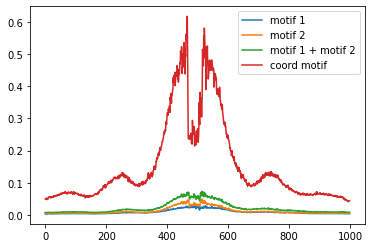

0.54325694 (100, 1)
1.0790068 (100,)
min effect mean Y: -0.012527516
distance: -130
direction of m1: 0.18216658
direction of m2: 0.17060758


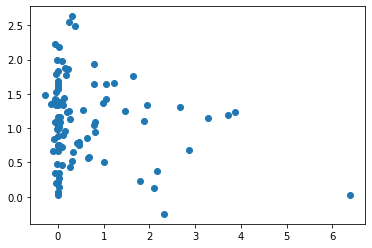

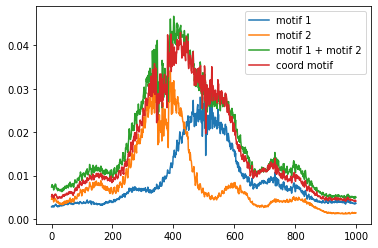

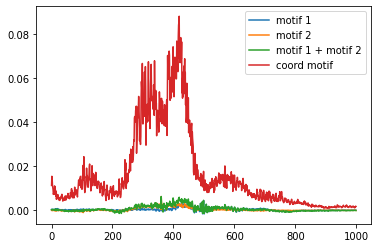

0.30300313 (100, 1)
-0.012527516 (100,)
max-effect                              Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.3553      0.100      3.567      0.001       0.158       0.553
min-effect                              Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0545      0.013     -4.208      0.000      -0.080      -0.029


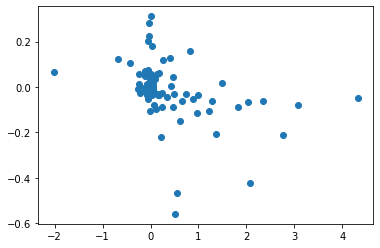

In [116]:
Y, X, Y1, X1 = get_x_y_for_motifs('TEAD-AP1')
model = OLS(Y,X)
results = model.fit()
print("max-effect",results.t_test([1]))

model = OLS(Y1,X1)
results = model.fit()
print("min-effect",results.t_test([1]))

max effect mean Y: 0.055288754
distance: -150
direction of m1: -0.12509489
direction of m2: 0.59439117


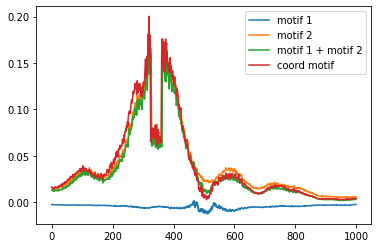

-0.88889104 (100, 1)
0.055288754 (100,)
min effect mean Y: -0.1461151
distance: 8
direction of m1: -0.12509489
direction of m2: 0.64565676


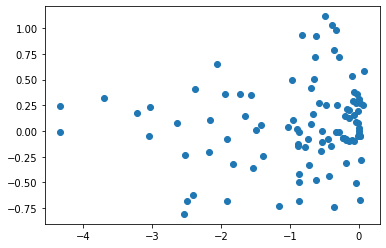

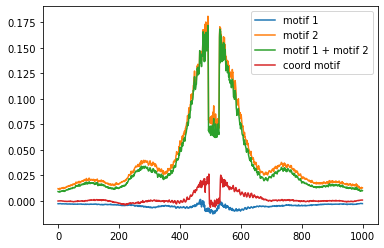

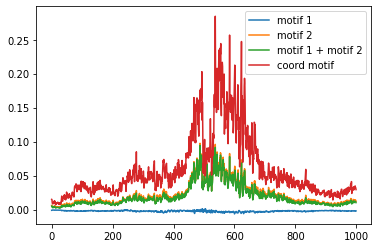

-1.0798337 (100, 1)
-0.1461151 (100,)
max-effect                              Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0030      0.030     -0.099      0.922      -0.063       0.057
min-effect                              Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0318      0.008      4.192      0.000       0.017       0.047


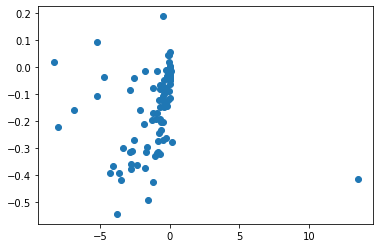

In [117]:
Y, X, Y1, X1 = get_x_y_for_motifs('ZEB-AP1')
model = OLS(Y,X)
results = model.fit()
print("max-effect",results.t_test([1]))

model = OLS(Y1,X1)
results = model.fit()
print("min-effect",results.t_test([1]))